In [1]:
import numpy as np
import pandas as pd

In [2]:
# Try different encodings to see which one works
encodings = ['latin1', 'iso-8859-1', 'utf-16']

for encoding in encodings:
    try:
        df = pd.read_csv('spam.csv', encoding=encoding)
        print("File read successfully with encoding:", encoding)
        break
    except UnicodeDecodeError:
        print("UnicodeDecodeError: Tried encoding", encoding)
        continue

# Now you can proceed with analyzing the DataFrame
df.sample(5)


File read successfully with encoding: latin1


,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
460,ham,Where did u go? My phone is gonna die you have...,NaN,NaN,NaN
3925,ham,I havent add Ì_ yet right..,NaN,NaN,NaN
1599,ham,"Yeah probably, I still gotta check out with leo",NaN,NaN,NaN
3169,ham,"Mah b, I'll pick it up tomorrow",NaN,NaN,NaN
2891,ham,Babe? You said 2 hours and it's been almost 4 ...,NaN,NaN,NaN


### 1. Data Cleaning

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [4]:
# drop last 3 cols
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)
df.sample(5)

,v1,v2
1592,ham,Will it help if we propose going back again to...
4611,ham,Sorry da. I gone mad so many pending works wha...
5151,ham,No problem with the renewal. I.ll do it right ...
5268,ham,\ER
2002,spam,TheMob>Yo yo yo-Here comes a new selection of ...


In [5]:
# renaming the cols
df.rename(columns={'v1':'target','v2':'text'},inplace=True)
df.sample(5)

,target,text
4853,ham,"Also north carolina and texas atm, you would j..."
748,ham,Is there a reason we've not spoken this year? ...
2596,ham,No i'm not gonna be able to. || too late notic...
1482,ham,Ok...
1141,spam,I don't know u and u don't know me. Send CHAT ...


##### Labe Encoding

In [6]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df['target'] = encoder.fit_transform(df['target'])
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [7]:
# missing values
df.isnull().sum()

target    0
text      0
dtype: int64

In [8]:
# check for duplicate values
df.duplicated().sum()

403

In [9]:
# remove duplicates
df = df.drop_duplicates(keep='first')

In [10]:
df.duplicated().sum()

0

In [11]:
df.shape

(5169, 2)

### 2.EDA 

In [12]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [13]:
df['target'].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

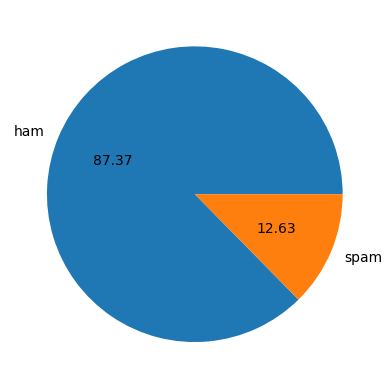

In [14]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(), labels=['ham','spam'],autopct="%0.2f")
plt.show()

C:\Users\ganes\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\ganes\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


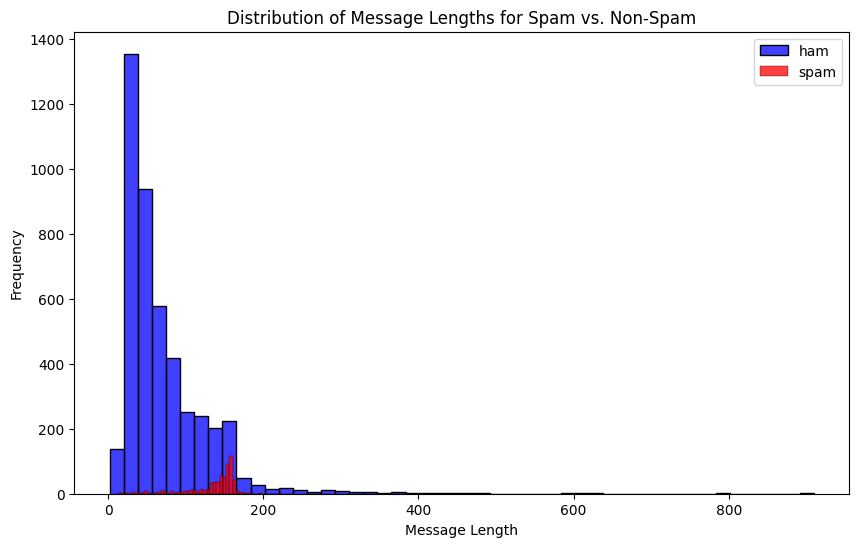

In [15]:
import seaborn as sns
#  Histogram of message lengths for spam vs. non-spam
plt.figure(figsize=(10, 6))
sns.histplot(df[df['target'] == 0]['text'].apply(len), bins=50, color='blue', label='ham')
sns.histplot(df[df['target'] == 1]['text'].apply(len), bins=50, color='red', label='spam')
plt.title('Distribution of Message Lengths for Spam vs. Non-Spam')
plt.xlabel('Message Length')
plt.ylabel('Frequency')
plt.legend()
plt.show()

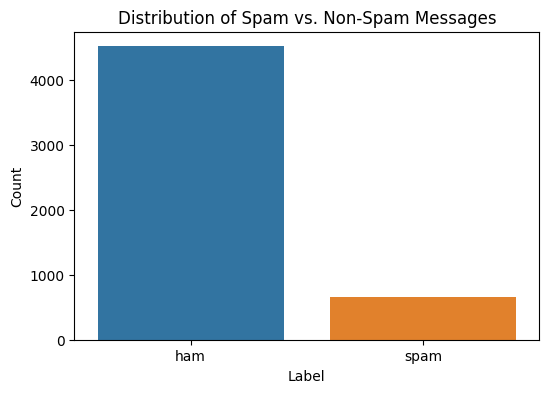

In [16]:
# Bar plot of spam vs. non-spam counts
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='target')
plt.title('Distribution of Spam vs. Non-Spam Messages')
plt.xlabel('Label')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['ham', 'spam'])  # Assuming ham is 0 and spam is 1
plt.show()

In [17]:
# Data is imbalanced
import nltk
!pip install nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ganes\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [18]:
 df['text']

0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568                Will Ì_ b going to esplanade fr home?
5569    Pity, * was in mood for that. So...any other s...
5570    The guy did some bitching but I acted like i'd...
5571                           Rofl. Its true to its name
Name: text, Length: 5169, dtype: object

In [19]:
df['text'].apply(len)

0       111
1        29
2       155
3        49
4        61
       ... 
5567    161
5568     37
5569     57
5570    125
5571     26
Name: text, Length: 5169, dtype: int64

In [20]:
df['num_characters'] = df['text'].apply(len)
df.head()

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [21]:
df['text'].apply(lambda x:(nltk.word_tokenize(x)))

0       [Go, until, jurong, point, ,, crazy, .., Avail...
1                [Ok, lar, ..., Joking, wif, u, oni, ...]
2       [Free, entry, in, 2, a, wkly, comp, to, win, F...
3       [U, dun, say, so, early, hor, ..., U, c, alrea...
4       [Nah, I, do, n't, think, he, goes, to, usf, ,,...
                              ...                        
5567    [This, is, the, 2nd, time, we, have, tried, 2,...
5568     [Will, Ì_, b, going, to, esplanade, fr, home, ?]
5569    [Pity, ,, *, was, in, mood, for, that, ., So, ...
5570    [The, guy, did, some, bitching, but, I, acted,...
5571                  [Rofl, ., Its, true, to, its, name]
Name: text, Length: 5169, dtype: object

In [22]:
df['text'].apply(lambda x:(nltk.word_tokenize(x)))[0]

['Go',
 'until',
 'jurong',
 'point',
 ',',
 'crazy',
 '..',
 'Available',
 'only',
 'in',
 'bugis',
 'n',
 'great',
 'world',
 'la',
 'e',
 'buffet',
 '...',
 'Cine',
 'there',
 'got',
 'amore',
 'wat',
 '...']

In [23]:
df['text'].apply(lambda x:(nltk.word_tokenize(x)))[0][0]

'Go'

In [24]:
df['text'].apply(lambda x:len(nltk.word_tokenize(x)))[0]

24

In [25]:
# num of words
df['num_words'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))
df.head()

,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [26]:
df['text'].apply(lambda x:(nltk.sent_tokenize(x)))

0       [Go until jurong point, crazy.., Available onl...
1                        [Ok lar..., Joking wif u oni...]
2       [Free entry in 2 a wkly comp to win FA Cup fin...
3       [U dun say so early hor... U c already then sa...
4       [Nah I don't think he goes to usf, he lives ar...
                              ...                        
5567    [This is the 2nd time we have tried 2 contact ...
5568              [Will Ì_ b going to esplanade fr home?]
5569    [Pity, * was in mood for that., So...any other...
5570    [The guy did some bitching but I acted like i'...
5571                        [Rofl., Its true to its name]
Name: text, Length: 5169, dtype: object

In [27]:
df['text'].apply(lambda x:(nltk.sent_tokenize(x)))[0]

['Go until jurong point, crazy..',
 'Available only in bugis n great world la e buffet... Cine there got amore wat...']

In [28]:
df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))[0]

2

In [29]:
df['num_sentences'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))
df.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [30]:
df[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [31]:
len(df['num_sentences'])

5169

In [32]:
# ham
df[df['target'] == 0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [33]:
#spam
df[df['target'] == 1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


C:\Users\ganes\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\ganes\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


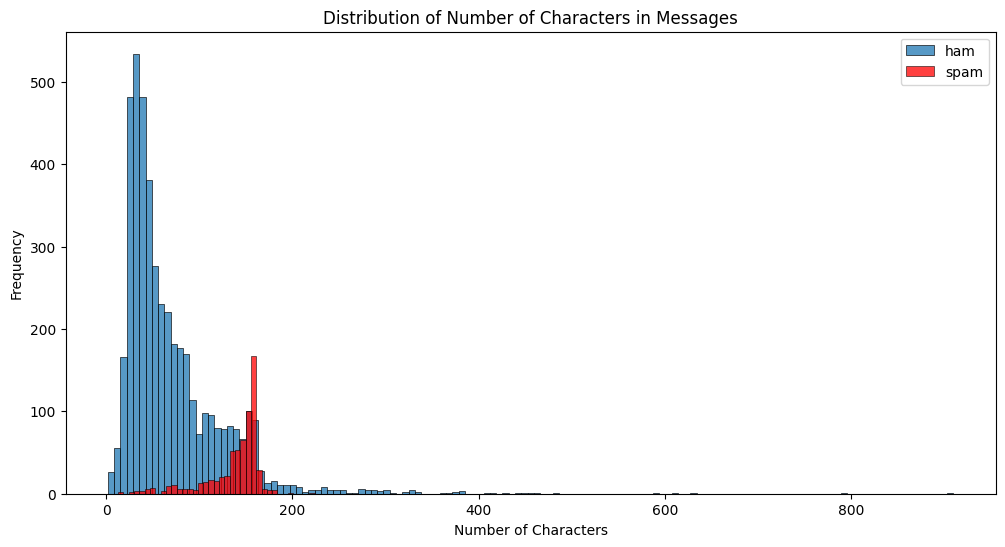

In [34]:
import seaborn as sns
plt.figure(figsize=(12, 6))
sns.histplot(df[df['target'] == 0]['num_characters'], label='ham')
sns.histplot(df[df['target'] == 1]['num_characters'], color='red', label='spam')  
plt.title('Distribution of Number of Characters in Messages')
plt.xlabel('Number of Characters')
plt.ylabel('Frequency')
plt.legend()
plt.show()

C:\Users\ganes\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\ganes\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


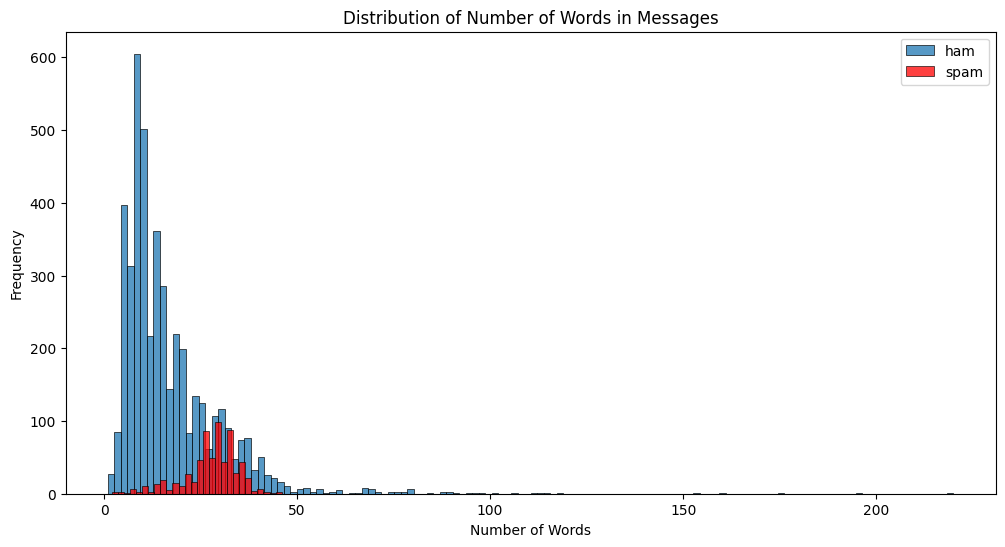

In [35]:
plt.figure(figsize=(12, 6))
sns.histplot(df[df['target'] == 0]['num_words'], label='ham')
sns.histplot(df[df['target'] == 1]['num_words'], color='red', label='spam') 
plt.title('Distribution of Number of Words in Messages')
plt.xlabel('Number of Words')
plt.ylabel('Frequency')
plt.legend()
plt.show()

C:\Users\ganes\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\ganes\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


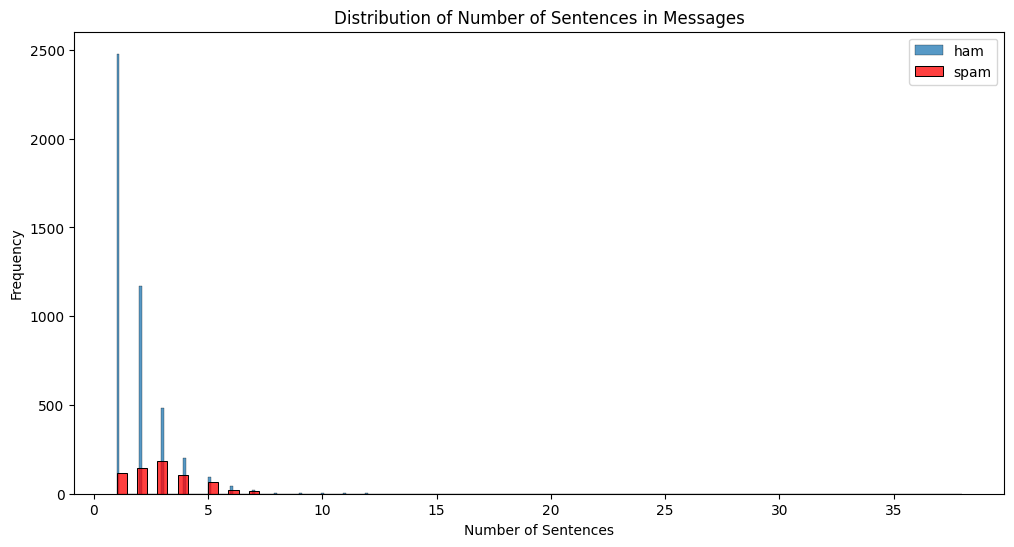

In [36]:
plt.figure(figsize=(12, 6))
sns.histplot(df[df['target'] == 0]['num_sentences'], label='ham')
sns.histplot(df[df['target'] == 1]['num_sentences'], color='red', label='spam') 
plt.title('Distribution of Number of Sentences in Messages')
plt.xlabel('Number of Sentences')
plt.ylabel('Frequency')
plt.legend()
plt.show()

In [37]:
df

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1
...,...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,161,35,4
5568,0,Will Ì_ b going to esplanade fr home?,37,9,1
5569,0,"Pity, * was in mood for that. So...any other s...",57,15,2
5570,0,The guy did some bitching but I acted like i'd...,125,27,1


C:\Users\ganes\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\ganes\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\ganes\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


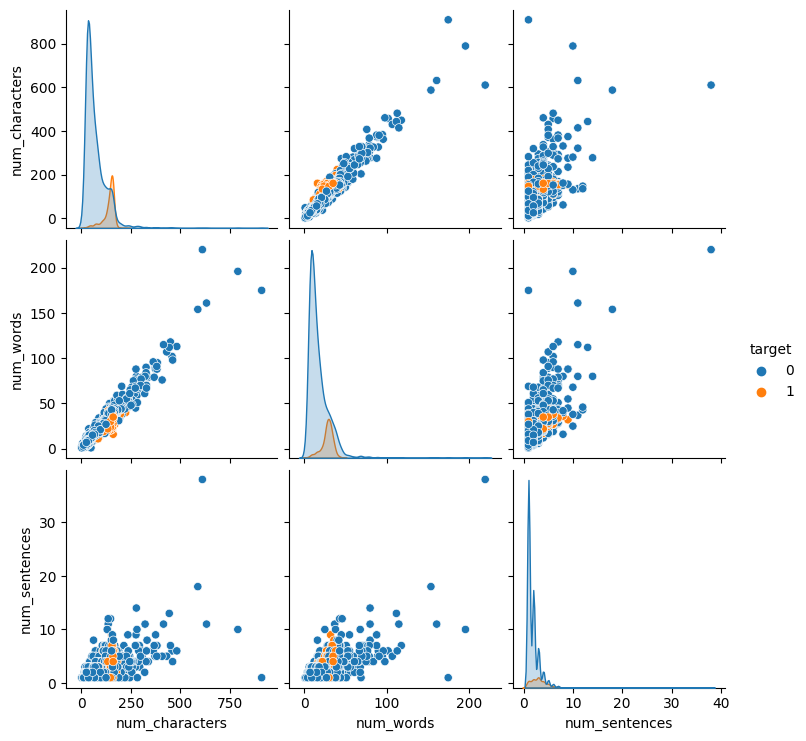

In [38]:
# relationship between the columns
sns.pairplot(df,hue='target')

In [39]:
df.dtypes

target             int32
text              object
num_characters     int64
num_words          int64
num_sentences      int64
dtype: object

In [40]:
df.select_dtypes(include='number').corr()

,target,num_characters,num_words,num_sentences
target,1.000000,0.384717,0.262912,0.263939
num_characters,0.384717,1.000000,0.965760,0.624139
num_words,0.262912,0.965760,1.000000,0.679971
num_sentences,0.263939,0.624139,0.679971,1.000000


In [41]:
numeric_df = df.select_dtypes(include=['int', 'float'])
numeric_df

,target,num_characters,num_words,num_sentences
0,0,111,24,2
1,0,29,8,2
2,1,155,37,2
3,0,49,13,1
4,0,61,15,1
...,...,...,...,...
5567,1,161,35,4
5568,0,37,9,1
5569,0,57,15,2
5570,0,125,27,1


<Axes: >

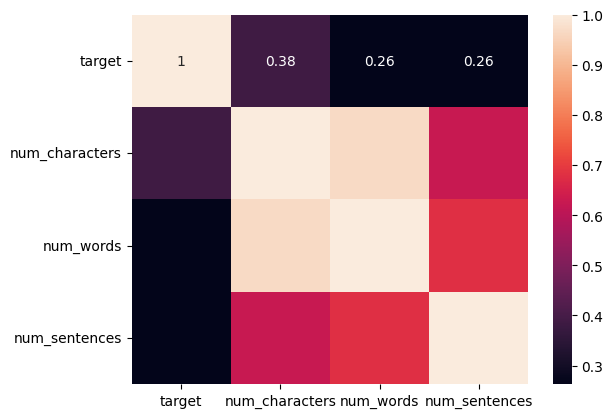

In [42]:
sns.heatmap(numeric_df.corr(),annot=True)

### 3. Data Preprocessing

In [43]:
def lower_text(text):
    text = text.lower() # lower the character
    return text

lower_text("Hi, How Are:?")

'hi, how are:?'

In [44]:
def tokenize_text(text):
    text = nltk.word_tokenize(text) # seperate the sentence by word wise
    return text

tokenize_text("Hi, How $ 3 Are:?")

['Hi', ',', 'How', '$', '3', 'Are', ':', '?']

In [45]:
# Removing Special Characters
def Removing_Special_Characters(text):
    text = text.lower()  # Lowercase the text
    text = nltk.word_tokenize(text)  # Tokenize the text into words
    y = []
    for i in text:
        if i.isalnum():  # Check if the word is alphanumeric
            y.append(i)  # Append alphanumeric words to the list
    return y

Removing_Special_Characters("Hi, 6 $ ! How $ 3% Are:?")  # Test the function

['hi', '6', 'how', '3', 'are']

In [46]:
# Removing Stop Words and Punctuation
import nltk
from nltk.corpus import stopwords 
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [47]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [48]:
def Remove_stop_words_punctuation(text):
    text = text.lower()  # Lowercase the text
    text = nltk.word_tokenize(text)  # Tokenize the text into words
    
    y = []

    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation: # Removing stop words and punctuation
            y.append(i)  # Again append to empty y
    return y

# Test the function with a properly formatted text argument
Remove_stop_words_punctuation("Text: Hello! This is a Mixed Case Text with Numbers 12  3 and Special Characters #$%^&* government Vibobook")

['text',
 'hello',
 'mixed',
 'case',
 'text',
 'numbers',
 '12',
 '3',
 'special',
 'characters',
 'government',
 'vibobook']

In [49]:
def steamming(text):
    text = text.lower()  # Lowercase the text
    text = nltk.word_tokenize(text)  # Tokenize the text into words
    
    y = []
 
    ps = PorterStemmer()
    for i in text:
        y.append(ps.stem(i))  # Stemming
    return y

# Test the function with a properly formatted text argument
steamming("Text: Hello! playing dancing singing ThiMixed Case racters #$%^&*  Vibobook")

['text',
 ':',
 'hello',
 '!',
 'play',
 'danc',
 'sing',
 'thimix',
 'case',
 'racter',
 '#',
 '$',
 '%',
 '^',
 '&',
 '*',
 'vibobook']

In [50]:
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
    
    text = y[:]
    y.clear()
    
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
            
    text = y[:]
    y.clear()
    ps = PorterStemmer()
    for i in text:
        y.append(ps.stem(i))
    
    # return y        
    return " ".join(y)


In [51]:
df['text'][10]

"I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today."

In [52]:
transform_text("I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today.")

'gon na home soon want talk stuff anymor tonight k cri enough today'

In [53]:
df['transformed_text'] = df['text'].apply(transform_text)

In [54]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [55]:
# WordCloud only show important words
from wordcloud import WordCloud 
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')
spam_wc = wc.generate(df[df['target'] == 1]['transformed_text'].str.cat(sep=" "))

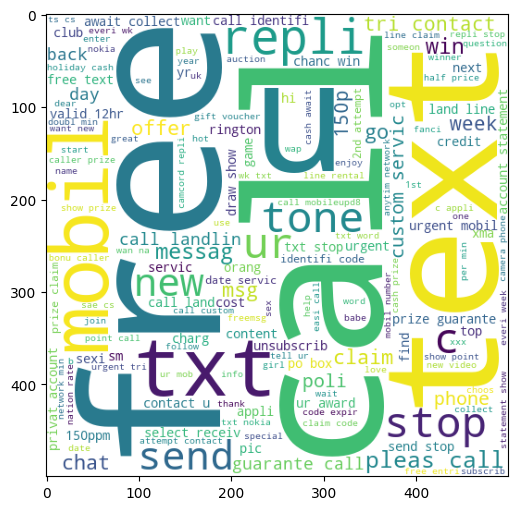

In [56]:
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

In [57]:
ham_wc = wc.generate(df[df['target'] == 0]['transformed_text'].str.cat(sep=" "))

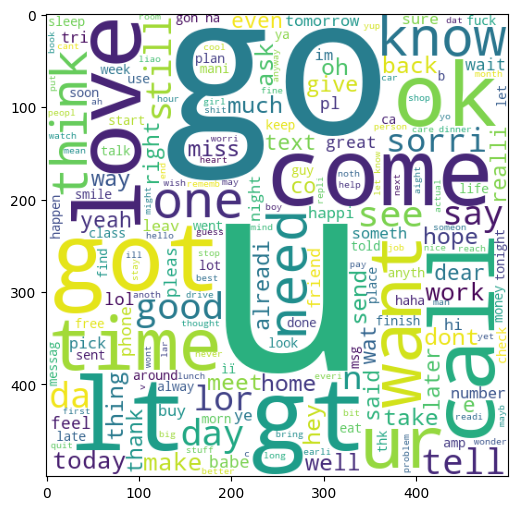

In [58]:
plt.figure(figsize=(15,6))
plt.imshow(ham_wc)

In [59]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [60]:
spam_corpus = []
for msg in df[df['target'] == 1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [61]:
len(spam_corpus)

9939

In [62]:
from collections import Counter
(Counter(spam_corpus).most_common(30))

[('call', 320),
 ('free', 191),
 ('2', 155),
 ('txt', 141),
 ('text', 122),
 ('u', 119),
 ('ur', 119),
 ('mobil', 114),
 ('stop', 104),
 ('repli', 103),
 ('claim', 98),
 ('4', 97),
 ('prize', 82),
 ('get', 74),
 ('new', 64),
 ('servic', 64),
 ('tone', 63),
 ('send', 60),
 ('urgent', 57),
 ('nokia', 57),
 ('contact', 56),
 ('award', 55),
 ('phone', 52),
 ('cash', 51),
 ('pleas', 51),
 ('week', 49),
 ('win', 48),
 ('c', 45),
 ('collect', 45),
 ('min', 45)]

In [63]:
from collections import Counter
pd.DataFrame(Counter(spam_corpus).most_common(30))

,0,1
0,call,320
1,free,191
2,2,155
3,txt,141
4,text,122
5,u,119
6,ur,119
7,mobil,114
8,stop,104
9,repli,103


In [65]:
# pd.DataFrame(most_common_items, columns=['Item', 'Count'])

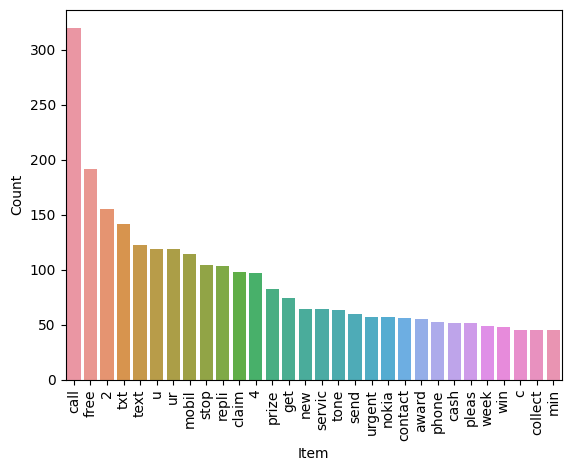

In [66]:
from collections import Counter
# Get the most common 30 items from the spam_corpus
most_common_items = Counter(spam_corpus).most_common(30)

# Create a DataFrame from the most common items
most_common_items = pd.DataFrame(most_common_items, columns=['Item', 'Count'])

# Plot the barplot
sns.barplot(data=most_common_items, x='Item', y='Count')
plt.xticks(rotation='vertical')
plt.show()

In [67]:
ham_corpus = []
for msg in df[df['target'] == 0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [68]:
len(ham_corpus)

35404

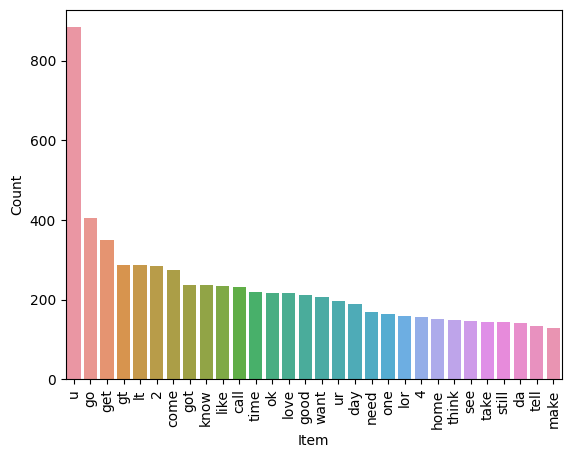

In [69]:
from collections import Counter
# Get the most common 30 items from the spam_corpus
most_common_items = Counter(ham_corpus).most_common(30)

# Create a DataFrame from the most common items
most_common_items = pd.DataFrame(most_common_items, columns=['Item', 'Count'])

# Plot the barplot
sns.barplot(data=most_common_items, x='Item', y='Count')
plt.xticks(rotation='vertical')
plt.show()

### 4. Model Building

In [70]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [71]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
# tfidf = TfidfVectorizer()
tfidf = TfidfVectorizer(max_features=3000)
X = tfidf.fit_transform(df['transformed_text']).toarray()

In [72]:
#from sklearn.preprocessing import MinMaxScaler
#scaler = MinMaxScaler()
#X = scaler.fit_transform(X)
# appending the num_character col to X
#X = np.hstack((X,df['num_characters'].values.reshape(-1,1)))

In [73]:
X.shape

(5169, 3000)

In [74]:
y = df['target'].values

In [75]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [76]:
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8694390715667312
[[788 108]
 [ 27 111]]
0.5068493150684932


In [77]:
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9709864603481625
[[896   0]
 [ 30 108]]
1.0


In [78]:
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9835589941972921
[[895   1]
 [ 16 122]]
0.991869918699187


In [79]:
# tfidf --> MNB

In [80]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [81]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [82]:
clfs = {
    'SVC' : svc,
    'KN' : knc, 
    'NB': mnb, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc, 
    'BgC': bc, 
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [83]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    
    return accuracy,precision

In [84]:
train_classifier(svc,X_train,y_train,X_test,y_test)

(0.9758220502901354, 0.9747899159663865)

In [85]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    
    current_accuracy,current_precision = train_classifier(clf, X_train,y_train,X_test,y_test)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy -  0.9758220502901354
Precision -  0.9747899159663865
For  KN
Accuracy -  0.9052224371373307
Precision -  1.0
For  NB
Accuracy -  0.9709864603481625
Precision -  1.0
For  DT
Accuracy -  0.9303675048355899
Precision -  0.8367346938775511
For  LR
Accuracy -  0.9584139264990329
Precision -  0.9702970297029703
For  RF
Accuracy -  0.9758220502901354
Precision -  0.9829059829059829
For  AdaBoost
Accuracy -  0.960348162475822
Precision -  0.9292035398230089
For  BgC
Accuracy -  0.9584139264990329
Precision -  0.8682170542635659
For  ETC
Accuracy -  0.9748549323017408
Precision -  0.9745762711864406
For  GBDT
Accuracy -  0.9468085106382979
Precision -  0.9191919191919192
For  xgb
Accuracy -  0.9671179883945842
Precision -  0.9333333333333333


In [86]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)
performance_df

,Algorithm,Accuracy,Precision
1,KN,0.905222,1.000000
2,NB,0.970986,1.000000
5,RF,0.975822,0.982906
0,SVC,0.975822,0.974790
8,ETC,0.974855,0.974576
4,LR,0.958414,0.970297
10,xgb,0.967118,0.933333
6,AdaBoost,0.960348,0.929204
9,GBDT,0.946809,0.919192
7,BgC,0.958414,0.868217


In [87]:
performance_df1 = pd.melt(performance_df, id_vars = "Algorithm")
performance_df1

,Algorithm,variable,value
0,KN,Accuracy,0.905222
1,NB,Accuracy,0.970986
2,RF,Accuracy,0.975822
3,SVC,Accuracy,0.975822
4,ETC,Accuracy,0.974855
5,LR,Accuracy,0.958414
6,xgb,Accuracy,0.967118
7,AdaBoost,Accuracy,0.960348
8,GBDT,Accuracy,0.946809
9,BgC,Accuracy,0.958414


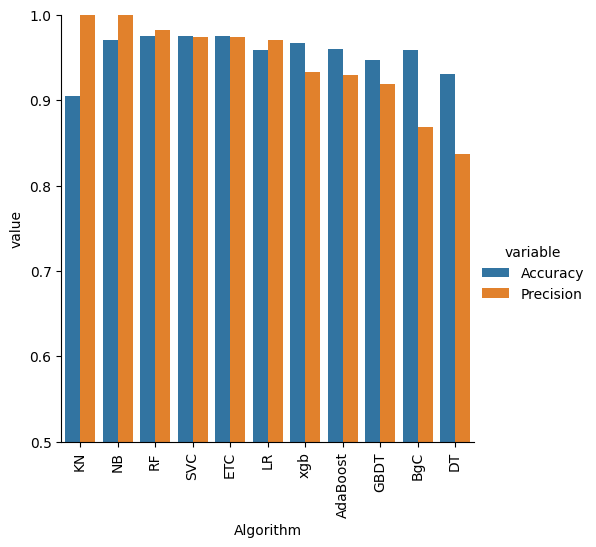

In [88]:
sns.catplot(x = 'Algorithm', y='value', 
               hue = 'variable',data=performance_df1, kind='bar',height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()

In [89]:
# model improve
# 1. Change the max_features parameter of TfIdf

In [90]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_max_ft_3000':accuracy_scores,'Precision_max_ft_3000':precision_scores}).sort_values('Precision_max_ft_3000',ascending=False)

In [91]:
performance_df.merge(temp_df,on='Algorithm')

,Algorithm,Accuracy,Precision,Accuracy_max_ft_3000,Precision_max_ft_3000
0,KN,0.905222,1.000000,0.905222,1.000000
1,NB,0.970986,1.000000,0.970986,1.000000
2,RF,0.975822,0.982906,0.975822,0.982906
3,SVC,0.975822,0.974790,0.975822,0.974790
4,ETC,0.974855,0.974576,0.974855,0.974576
5,LR,0.958414,0.970297,0.958414,0.970297
6,xgb,0.967118,0.933333,0.967118,0.933333
7,AdaBoost,0.960348,0.929204,0.960348,0.929204
8,GBDT,0.946809,0.919192,0.946809,0.919192
9,BgC,0.958414,0.868217,0.958414,0.868217


In [92]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_scaling':accuracy_scores,'Precision_scaling':precision_scores}).sort_values('Precision_scaling',ascending=False)

In [93]:
new_df = performance_df.merge(temp_df,on='Algorithm')

In [94]:
new_df_scaled = new_df.merge(temp_df,on='Algorithm')

In [95]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_num_chars':accuracy_scores,'Precision_num_chars':precision_scores}).sort_values('Precision_num_chars',ascending=False)

In [96]:
new_df_scaled.merge(temp_df,on='Algorithm')

,Algorithm,Accuracy,Precision,Accuracy_scaling_x,Precision_scaling_x,Accuracy_scaling_y,Precision_scaling_y,Accuracy_num_chars,Precision_num_chars
0,KN,0.905222,1.000000,0.905222,1.000000,0.905222,1.000000,0.905222,1.000000
1,NB,0.970986,1.000000,0.970986,1.000000,0.970986,1.000000,0.970986,1.000000
2,RF,0.975822,0.982906,0.975822,0.982906,0.975822,0.982906,0.975822,0.982906
3,SVC,0.975822,0.974790,0.975822,0.974790,0.975822,0.974790,0.975822,0.974790
4,ETC,0.974855,0.974576,0.974855,0.974576,0.974855,0.974576,0.974855,0.974576
5,LR,0.958414,0.970297,0.958414,0.970297,0.958414,0.970297,0.958414,0.970297
6,xgb,0.967118,0.933333,0.967118,0.933333,0.967118,0.933333,0.967118,0.933333
7,AdaBoost,0.960348,0.929204,0.960348,0.929204,0.960348,0.929204,0.960348,0.929204
8,GBDT,0.946809,0.919192,0.946809,0.919192,0.946809,0.919192,0.946809,0.919192
9,BgC,0.958414,0.868217,0.958414,0.868217,0.958414,0.868217,0.958414,0.868217


In [97]:
df

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though
...,...,...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,161,35,4,2nd time tri 2 contact u pound prize 2 claim e...
5568,0,Will Ì_ b going to esplanade fr home?,37,9,1,b go esplanad fr home
5569,0,"Pity, * was in mood for that. So...any other s...",57,15,2,piti mood suggest
5570,0,The guy did some bitching but I acted like i'd...,125,27,1,guy bitch act like interest buy someth els nex...


In [103]:
# Create an instance of SVC
svc_model = SVC()

# Train the SVC model on the training data (X_train and y_train)
svc_model.fit(X_train, y_train)

SVC()

In [110]:
# Take input text
input_text = input("Enter the text to predict: ")

# Preprocess the input text using the same vectorizer
input_text_transformed = tfidf.transform([input_text])

# Convert the sparse input to dense format
input_text_transformed_dense = input_text_transformed.toarray()

# Make predictions on the preprocessed input text
predicted_label = svc_model.predict(input_text_transformed_dense)

# Print the predicted label
if predicted_label == 1:
    print("Predicted label: spam")
else:
    print("Predicted label: non spam")

Enter the text to predict:  Subject: Invitation to our Annual Charity Event  Dear [Recipient's Name],  We are delighted to extend an invitation to you for our upcoming Annual Charity Event, which will be held on [Date] at [Venue]. This event aims to raise funds for [Charity Name] to support their noble cause of providing education to underprivileged children in our community.  Your presence at the event would greatly contribute to its success and help us in achieving our fundraising goals.  Please RSVP by [RSVP Deadline] to confirm your attendance.  Warm regards, [Your Name] [Your Position/Title]


Predicted label: non spam


In [123]:
import pandas as pd

new_data = {'transformed_text': ["""
Subject: Urgent: Claim Your Prize Now!

Dear Winner,

Congratulations! You have been selected as the lucky winner of our grand prize draw. To claim your prize of $10,000, please click on the following link and provide your personal information: [link]

Don't miss this opportunity! Act now to claim your reward.

Best Regards,
The Prize Award Committee"""]}
d = pd.DataFrame(new_data)


In [124]:
# Preprocess the input text using the same vectorizer
input_text_transformed = tfidf.transform(d['transformed_text'])

# Convert the sparse input to dense format
input_text_transformed_dense = input_text_transformed.toarray()

# Make predictions on the preprocessed input text
y_score = svc_model.predict(input_text_transformed_dense)

# Print the predicted label
if y_score == 1:
    print("Predicted label: spam")
else:
    print("Predicted label: non spam")


Predicted label: spam


In [126]:
import pandas as pd

new_data = {'transformed_text': ["""Subject: Invitation to Our Annual Charity Event

Dear [Recipient's Name],

We're excited to invite you to our annual charity event to raise funds for [Charity Organization]. This year's event will feature live music, delicious food, and inspiring guest speakers.

Date: [Date]
Time: [Time]
Location: [Location]

Your support means the world to us. Together, we can make a difference in the lives of those in need.

Please RSVP by [RSVP Deadline] to secure your spot at this special event.

Warm regards,
[Your Name]
[Your Position]
[Your Organization]
"""]}
d = pd.DataFrame(new_data)


In [127]:
# Preprocess the input text using the same vectorizer
input_text_transformed = tfidf.transform(d['transformed_text'])

# Convert the sparse input to dense format
input_text_transformed_dense = input_text_transformed.toarray()

# Make predictions on the preprocessed input text
y_score = svc_model.predict(input_text_transformed_dense)

# Print the predicted label
if y_score == 1:
    print("Predicted label: spam")
else:
    print("Predicted label: non spam")


Predicted label: non spam


### Voting Classifier

In [113]:
# Voting Classifier
svc = SVC(kernel='sigmoid', gamma=1.0,probability=True)
mnb = MultinomialNB()
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)

from sklearn.ensemble import VotingClassifier
voting = VotingClassifier(estimators=[('svm', svc), ('nb', mnb), ('et', etc)],voting='soft')
voting.fit(X_train,y_train)

VotingClassifier(estimators=[('svm',
                              SVC(gamma=1.0, kernel='sigmoid',
                                  probability=True)),
                             ('nb', MultinomialNB()),
                             ('et',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2))],
                 voting='soft')

In [114]:
y_pred = voting.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9816247582205029
Precision 0.9917355371900827


In [118]:
# Take input text
input_text = input("Enter the text to predict: ")

# Preprocess the input text using the same vectorizer
input_text_transformed = tfidf.transform([input_text])

# Convert the sparse input to dense format
input_text_transformed_dense = input_text_transformed.toarray()

# Make predictions on the preprocessed input text
predicted_label = voting.predict(input_text_transformed_dense)

# Print the predicted label
if predicted_label == 1:
    print("Predicted label: spam")
else:
    print("Predicted label: non spam")

Enter the text to predict:  Subject: Invitation to Our Annual Charity Event  Dear [Recipient's Name],  We're excited to invite you to our annual charity event to raise funds for [Charity Organization]. This year's event will feature live music, delicious food, and inspiring guest speakers.  Date: [Date] Time: [Time] Location: [Location]  Your support means the world to us. Together, we can make a difference in the lives of those in need.  Please RSVP by [RSVP Deadline] to secure your spot at this special event.  Warm regards, [Your Name] [Your Position] [Your Organization]


Predicted label: non spam


In [132]:
import pandas as pd

new_data = {'transformed_text': ["""
Subject: Urgent: Claim Your Prize Now!

Dear Winner,

Congratulations! You have been selected as the lucky winner of our grand prize draw. To claim your prize of $10,000, please click on the following link and provide your personal information: [link]

Don't miss this opportunity! Act now to claim your reward.

Best Regards,
The Prize Award Committee"""]}
d = pd.DataFrame(new_data)


In [133]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Preprocess the input text using the same vectorizer
input_text_transformed = tfidf.transform(d['transformed_text'])

# Convert the sparse input to dense format
input_text_transformed_dense = input_text_transformed.toarray()

# Make predictions on the preprocessed input text
y_score = svc_model.predict(input_text_transformed_dense)

# Print the predicted label
if y_score == 1:
    print("Predicted label: spam")
else:
    print("Predicted label: non spam")


Predicted label: spam


In [130]:
import pandas as pd

new_data = {'transformed_text': ["""Subject: Invitation to Our Annual Charity Event

Dear [Recipient's Name],

We're excited to invite you to our annual charity event to raise funds for [Charity Organization]. This year's event will feature live music, delicious food, and inspiring guest speakers.

Date: [Date]
Time: [Time]
Location: [Location]

Your support means the world to us. Together, we can make a difference in the lives of those in need.

Please RSVP by [RSVP Deadline] to secure your spot at this special event.

Warm regards,
[Your Name]
[Your Position]
[Your Organization]
"""]}
d = pd.DataFrame(new_data)


In [131]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Preprocess the input text using the same vectorizer
input_text_transformed = tfidf.transform(d['transformed_text'])

# Convert the sparse input to dense format
input_text_transformed_dense = input_text_transformed.toarray()

# Make predictions on the preprocessed input text
y_score = svc_model.predict(input_text_transformed_dense)

# Print the predicted label
if y_score == 1:
    print("Predicted label: spam")
else:
    print("Predicted label: non spam")


Predicted label: non spam


### Applying stacking

In [ ]:
# # Applying stacking
# estimators=[('svm', svc), ('nb', mnb), ('et', etc)]
# final_estimator=RandomForestClassifier()

# from sklearn.ensemble import StackingClassifier
# clf = StackingClassifier(estimators=estimators, final_estimator=final_estimator)

In [ ]:
# clf.fit(X_train,y_train)
# y_pred = clf.predict(X_test)
# print("Accuracy",accuracy_score(y_test,y_pred))
# print("Precision",precision_score(y_test,y_pred))

In [ ]:
# import pickle
# pickle.dump(tfidf,open('vectorizer.pkl','wb'))
# pickle.dump(mnb,open('model.pkl','wb'))